In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import banana_lib as sz
import banana_plot as bp
import random
from scipy.optimize import curve_fit
from matplotlib import cm

desktop = r"C:\Users\Szymek\Desktop"
paths = {
    "desktop": desktop,
    "matrices": desktop + r"\LAMMPS_matrices",
    "matrices_centers": desktop + r"\LAMMPS_matrices\centers_matrices",
    "matrices_directors": desktop + r"\LAMMPS_matrices\directors_matrices",
    "matrices_scatter": desktop + r"\LAMMPS_matrices\scatter_matrices",
    "smectic_params": desktop + r"\smectic_params_new.txt",
    "images": desktop + r"\checkpoint_01.03.24\images",
    "example": desktop + r"\LAMMPS_matrices\centers_matrices\centers_screen_bulk_6k_0.32.txt",
    "test": desktop + r"\test.png"
    }


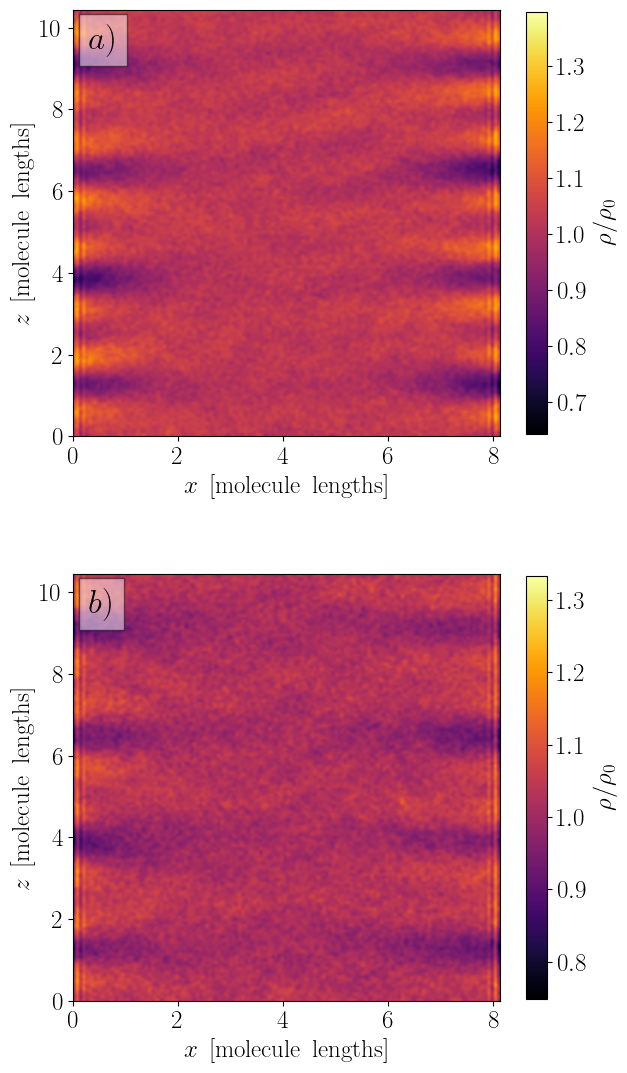

In [8]:
# heatmap centers 2z 
# file = paths["matrices_centers"] + "\centers_screen_bulk_6k_0.32.txt"
file1 = paths["matrices"] + "\centers_screen_bulk_double_z_0.32.txt"
file2 = paths["matrices"] + "\centers_screen_bulk_double_z_0.312.txt"
target = paths["images"] + "\centers_double_z.png"

options = {'xlabel': r"$x\:\:[\mathrm{molecule\:\:lengths}]$", 
           'ylabel': r"$z\:\:[\mathrm{molecule\:\:lengths}]$", 
           'extent': [0, 70/8.62, 0, 90/8.62], 'aspect': 70/90,
           'cmap': 'inferno', 'cbarlabel': r'$\rho / \rho_0$',
           'cbarticks': np.arange(0.7, 1.3, 0.1), 'cbarshrink': 0.75}

fig, ax = plt.subplots(2, 1, figsize=(6.6, 12))
ax[0] = bp.HeatmapPlotter(file1, '', plot_attr=options).plot(fig, ax[0], normalize=True, show=False)
ax[0].text(0.3, 9.5, r'$a)$', fontsize=24, bbox={'pad': 7, 'alpha': 0.5, 'facecolor': 'white'})


options["cbarticks"] = np.arange(0.8, 1.4, 0.1)
ax[1] = bp.HeatmapPlotter(file2, '', plot_attr=options).plot(fig, ax[1], normalize=True, show=False)
ax[1].text(0.3, 9.5, r'$b)$', fontsize=24, bbox={'pad': 7, 'alpha': 0.5, 'facecolor': 'white'})

# plt.show()
plt.savefig(target, dpi=300)

In [9]:
# read correlation data from "smectic_params" file
x = 150
density, lambd, varLambd, amplitude, varAmplitude = [], [], [], [], []

with open(paths["smectic_params"], "r") as f:
    for line in f:
        line = line.strip().split("=")
        # print(line)
        if line[0] == "d ":
            density.append(line[-1])
        elif line[0] == "A ": 
            amplitude.append(line[-1])
        elif line[0] == "varA ":
            varAmplitude.append(line[-1])
        elif line[0] == "lambda ":
            # clamp correlation length to 300 pixels for readability
            l = line[-1]
            if float(l) > 7.:
                l = 7.
            lambd.append(l)
        elif line[0] == "varLambda ": 
            l = line[-1]
            if float(l) > 0.5:
                l = 0.5
            varLambd.append(l)
        else:
            continue
        
density = np.array(density, dtype=float)
amplitude = np.array(amplitude, dtype=float)
Damplitude = np.array(varAmplitude, dtype=float)
lambd = np.array(lambd, dtype=float)
Dlambd = np.array(varLambd, dtype=float)
# lambd *= 1/7      # rescale correlation length from pixels to box width

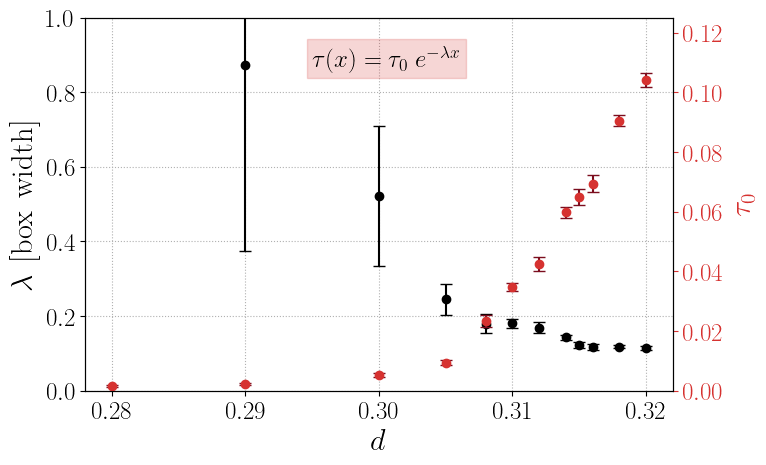

In [10]:
# smectic parameters
# file = paths["images"] + "\correlation_lengths_vs_density.png"
tau_test = paths["test"]
lambda_test = paths["test"]
red = '#D63230'         # persian red
darker_red = '#7B0D1E'  # burgundy
lambda_options = {'textpos': (0.295, 0.87), 'text': r'$\tau(x) = \tau_0 \;e^{-\lambda x}$', 'xlabel': r'$d$', 'ylabel': r"$\lambda \hspace{0.3cm} \mathrm{[box\;\,width]}$", 'grid_style': 'dotted'}
tau_options = {'xlabel': r'$d$', 'ylabel': r"$\tau_0$", 'c': red, 'ecolor': darker_red, 'ctick': red, 'cylabel': red, 'ylim': (0, 0.125)}


fig1, ax1 = plt.subplots(figsize = (8, 5), sharex=False, sharey=False)

# lambda plot
ax1 = bp.ErrorPlotter(density, lambd, Dlambd, target_path=tau_test, plot_attr=lambda_options).plot(ax1, show=False)

# tau plot
ax2 = ax1.twinx()
ax2 = bp.ErrorPlotter(density, amplitude, Damplitude, target_path=lambda_test, plot_attr=tau_options).plot(ax2, show=False)

# fig1.legend(loc='center left')
plt.show()
# plt.savefig(paths['images'] + '\correlation_lengths.png')

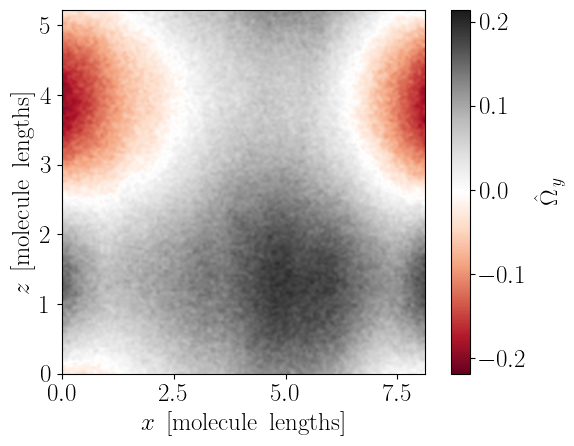

In [11]:
# heatmap directors NSB
# file = paths["matrices_centers"] + "\centers_screen_bulk_6k_0.32.txt"
file = paths["matrices_directors"] + "\directors_screen_bulk_6k_0.3.txt"
target = paths["images"] + "\directors_NSB.png"

options = {'xlabel': r"$x\:\:[\mathrm{molecule\:\:lengths}]$", 
           'ylabel': r"$z\:\:[\mathrm{molecule\:\:lengths}]$", 
           'extent': [0, 70/8.62, 0, 45/8.62], 'cmap': 'RdGy', 'cbarlabel': r'$\hat{\Omega}_{\,y}$'}

fig, ax = plt.subplots()
ax = bp.HeatmapPlotter(file, '', plot_attr=options).plot(fig, ax, show=False)
# bp.HeatmapPlotter(file, paths["test"], plot_attr=options).save()

# plt.show()
plt.savefig(target, dpi=300)

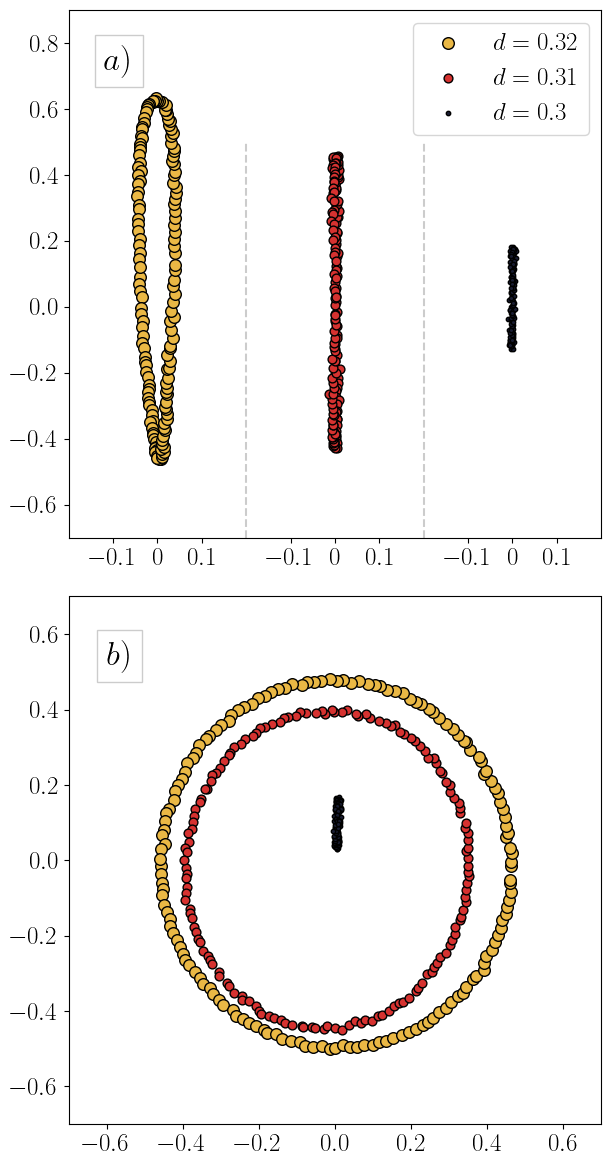

In [12]:
# scatter directors 3in1
files_wall = [paths['matrices_scatter'] + '\scatter_screen_wall_6k_0.32.txt',
              paths['matrices_scatter'] + '\scatter_screen_wall_6k_0.31.txt',
              paths['matrices_scatter'] + '\scatter_screen_wall_6k_0.3.txt']

files_bulk = [paths['matrices_scatter'] + '\scatter_screen_bulk_6k_0.32.txt',
              paths['matrices_scatter'] + '\scatter_screen_bulk_6k_0.314.txt',
              paths['matrices_scatter'] + '\scatter_screen_bulk_6k_0.3.txt']

target = paths['images'] + '\scatter_directors.png'

# define parameters for each density
colors = ['#EAB845', '#D63230', '#191D32']
legend = [r'$d=0.32$', r'$d=0.31$', r'$d=0.3$']
size = [70, 40, 10]


fig, ax = plt.subplots(2, 1, figsize=(6.6, 12))
# upper plot
for i, file in enumerate(files_wall):
    options = {'c': colors[i], 's': size[i], 'label': legend[i], 'xlim': (-0.6, 0.6), 'ylim': (-0.7, 0.9)}
    ax[0] = bp.ScatterPlotter(file, '', plot_attr=options).plot(fig, ax[0], show=False, i=i)

# lower plot
for i, file in enumerate(files_bulk):
    options = {'c': colors[i], 's': size[i], 'label': legend[i], 'ylim': (-0.7, 0.7)}
    ax[1] = bp.ScatterPlotter(file, '', plot_attr=options).plot(fig, ax[1], show=False)

# legend and text annotations
ax[0].legend()
ax[0].text(-0.52, 0.72, r'$a)$', fontsize=24, bbox={'pad': 7, 'alpha': 0.2, 'facecolor': 'white'})
ax[0].vlines([-0.2, 0.2], -0.7, 0.5, alpha=0.2, color='black', linestyle='--')
ax[0].set_xticks(np.array([-0.5, -0.4, -0.3, -0.1, 0, 0.1, 0.3, 0.4, 0.5]), ['$-0.1$', '$0$', '$0.1$', '$-0.1$', '$0$', '$0.1$', '$-0.1$', '$0$', '$0.1$'])

ax[1].text(-0.6, 0.52, r'$b)$', fontsize=24, bbox={'pad': 7, 'alpha': 0.2, 'facecolor': 'white'})
# ax[1].text(-0.05, 0.65, r'$\mathbf{bulk}$', bbox={'pad': 7, 'alpha': 0.2, 'facecolor': 'white'})

# plt.show()
plt.savefig(target, dpi=300)


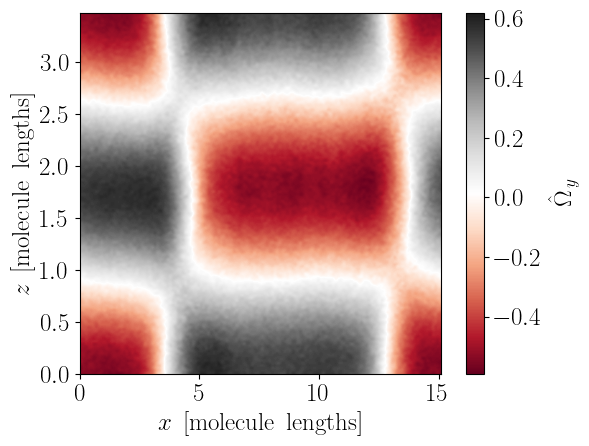

In [13]:
# heatmap domains directors 
# file = paths["matrices_centers"] + "\centers_screen_bulk_6k_0.32.txt"
# file = paths["matrices_directors"] + "\directors_screen_bulk_6k_0.31.txt"
file = paths["matrices"] + "\directors_screen_bulk_two_domains_0.32.txt"
target = paths["images"] + "\directors_domains.png"

options = {'xlabel': r"$x\:\:[\mathrm{molecule\:\:lengths}]$", 
           'ylabel': r"$z\:\:[\mathrm{molecule\:\:lengths}]$", 
           'extent': [0, 130/8.62, 0, 30/8.62], 'aspect': 130/30,
           'cmap': 'RdGy', 'cbarlabel': r'$\hat{\Omega}_{\,y}$'}

fig, ax = plt.subplots()
ax = bp.HeatmapPlotter(file, '', plot_attr=options).plot(fig, ax, show=False)
# bp.HeatmapPlotter(file, paths["test"], plot_attr=options).save()

plt.show()
# plt.savefig(target, dpi=300)

In [14]:
# scatter domains interface
# file = paths['matrices_scatter'] + '\scatter_screen_interface_peter_case_0.32.txt'
file = "C:/Users/Szymek/Desktop/test_interface/0.txt"
# files = [x + str(i) + '.txt' for i in range(10)]


with open(file, "r") as f:
    matrix = [np.array(line.split()[-3:], dtype=np.float64) for line in f]
    matrix = np.array(matrix).reshape([-1, 3])


fig, ax = plt.subplots(figsize=(6.8, 6))
# draw on axes and add colorbar on canvas eg. figure
x = matrix[:, 0]
y = matrix[:, 1] 
pos = ax.scatter(x, y, c = 'black', s = 50, edgecolors = 'black')
ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Szymek/Desktop/test_interface/0.txt'

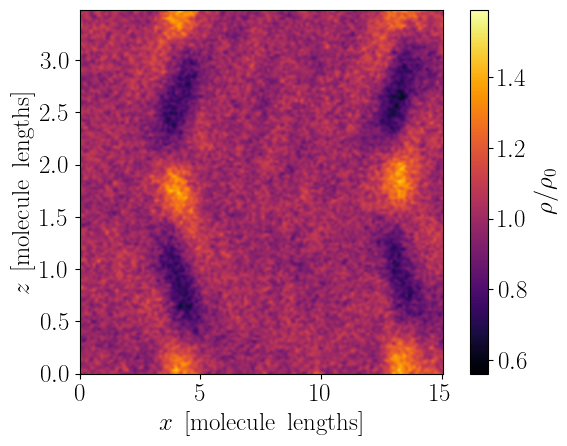

In [ ]:
# heatmap domain centers
file = paths["matrices"] + "\centers_screen_bulk_two_domains_0.32.txt"
target = paths["images"] + "\centers_domains.png"

options = {'xlabel': r"$x\:\:[\mathrm{molecule\:\:lengths}]$", 
           'ylabel': r"$z\:\:[\mathrm{molecule\:\:lengths}]$", 
            'extent': [0, 130/8.62, 0, 30/8.62], 'aspect': 130/30,
            'cmap': 'inferno', 'cbarlabel': r'$\rho / \rho_0$'}

fig, ax = plt.subplots()
ax = bp.HeatmapPlotter(file, '', plot_attr=options).plot(fig, ax, normalize = True, show=False)
# bp.HeatmapPlotter(file, paths["test"], plot_attr=options).save()

# plt.show()
plt.savefig(target, dpi=300)

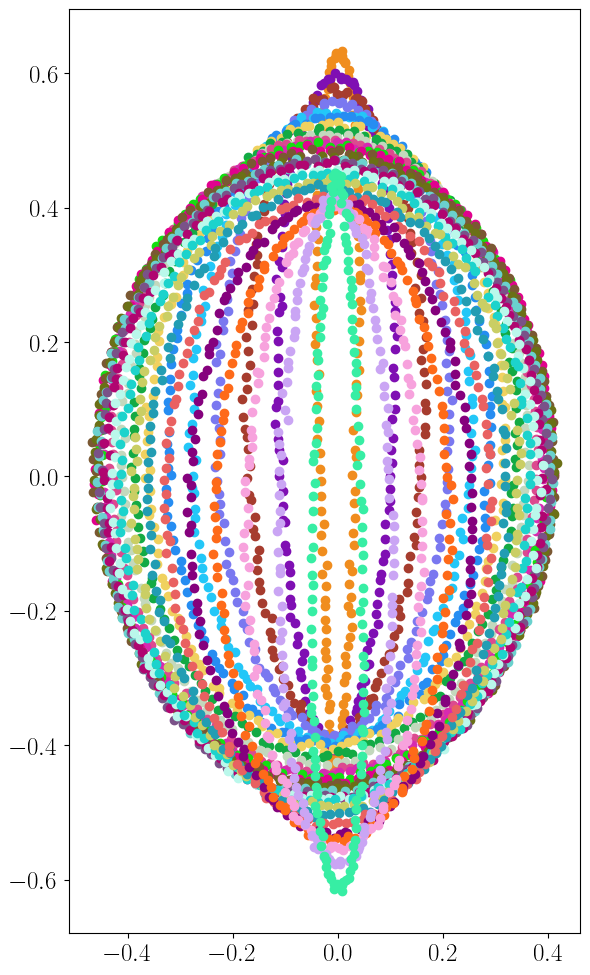

In [ ]:
from matplotlib.collections import PolyCollection

file = paths['desktop'] + r'\test_3d_plot.txt'
# target = paths['images'] + '\scatter_directors.png'

# data = np.zeros(28, 150, 3, dtype=np.float64)
data = []
with open(file, 'r') as f:
    for i, line in enumerate(f):
        l = line.split()
        data.append(l[-3:])
    
data = np.array(data, dtype=np.float64).reshape((-1, 150, 3))

fig, ax = plt.subplots(figsize=(6.6, 12))
# ax = plt.figure().add_subplot(projection='3d')

for i in range(data.shape[0]):
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    options = {'c': color}
    ax.scatter(data[i,:,0], data[i,:,1], c=color)
    # ax.add_collection3d(PolyCollection(data[i,:,:2]), zs=i, zdir='y')

plt.show()

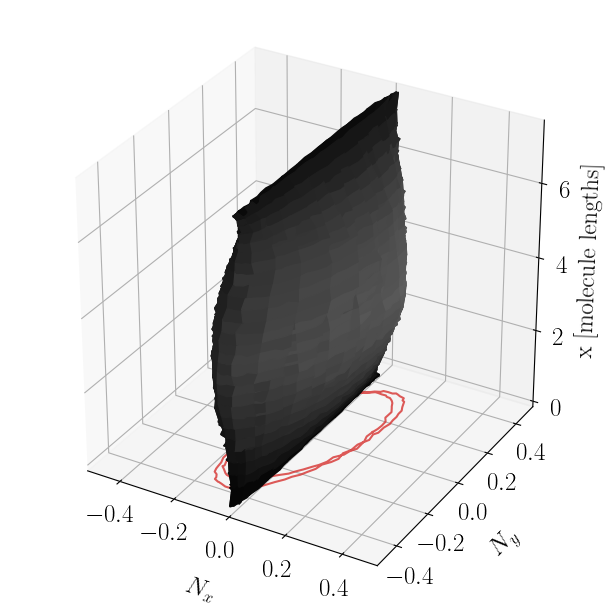

In [35]:
# file = paths['desktop'] + r'\test_3d_plot.txt'
file = paths['desktop'] + r'\3d_0.310.txt'
target = paths['images'] + r'\3d_directors.png'

# data = np.zeros(28, 150, 3, dtype=np.float64)
data = []
with open(file, 'r') as f:
    for i, line in enumerate(f):
        l = line.split()
        data.append(l[-3:])
    
data = np.array(data, dtype=np.float64).reshape((-1, 150, 3))
X_MAX = np.max(data[:, :, 1])
N_PIX = 150
N_SLICES = data.shape[0]
Z_BOX = 7.5
# viridis = matplotlib.colormaps['greys'], N_SLICES).colors

fig = plt.figure(figsize=(8, 6), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# for i in range(N_SLICES):
#     # color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#     x, y = data[i:i+1, :, 0], data[i:i+1, :, 1]
#     z = np.array([i, i+1])

#     color = (1 - np.max(x) / X_MAX) * np.ones(4)
#     options = {'c': color}

#     X, Z = np.meshgrid(x, z)
#     # print(X.shape, Z.shape)
# #     ax.scatter(data[i,:,0], data[i,:,1], c=color)
#     ax.plot_surface(x, y, Z, linewidth=0, color=color)


x = np.array([[*data[i, :, 0], data[i, 0, 0]] for i in range(data.shape[0])])   # extend grid by 1 column to make it periodic
y = np.array([[*data[i, :, 1], data[i, 0, 1]] for i in range(data.shape[0])])
z = np.outer(np.linspace(0, Z_BOX, N_SLICES), np.ones(N_PIX+1))     # 150 x 28+1 grid
# x = data[:, :2, 0]
# y = data[:, :2, 1]
# z = np.outer(np.linspace(0, Z_BOX, N_SLICES), np.ones(2))
# ax.plot_surface(x, y, z)


color = [[] for i in range(x.shape[0])]
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        # c = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        c = np.abs(np.max(x[i, :])) / X_MAX * np.ones(3)
        color[i].append(c)
ax.plot_surface(x, y, z, facecolors=color)

ax.set_xlabel(r'$N_x$', labelpad=15)
ax.set_ylabel(r'$N_y$', labelpad=15)
ax.set_zlabel(r'$\mathrm{x\;[molecule\;lengths]}$')
ax.set_box_aspect(aspect=(1,1,1), zoom=0.95)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)

ax.plot(x[x.shape[0]//2, :], y[y.shape[0]//2, :], c = '#D63230', alpha=0.8)


# plt.show()
# plt.savefig(target, dpi=300)

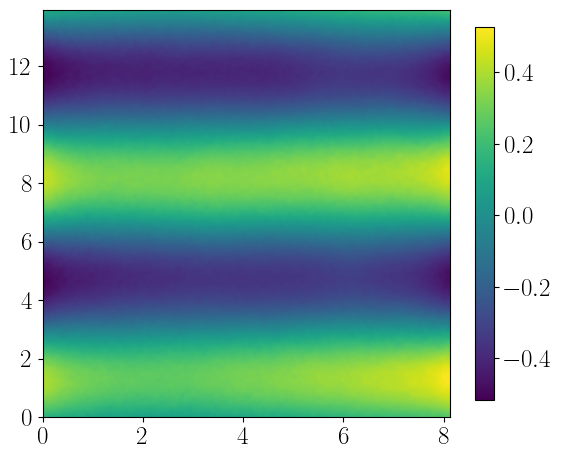

In [10]:
file1 = paths["matrices_directors"] + r"\directors_screen_bulk_double_z_0.31.txt"

options = {'extent': [0, 70/8.62, 0, 120/8.62], 'aspect': 70/120, 'cbarshrink': 0.5}

fig, ax = plt.subplots(figsize=(6,8))
ax = bp.HeatmapPlotter(file1, '', plot_attr=options).plot(fig, ax, normalize=False, show=False)

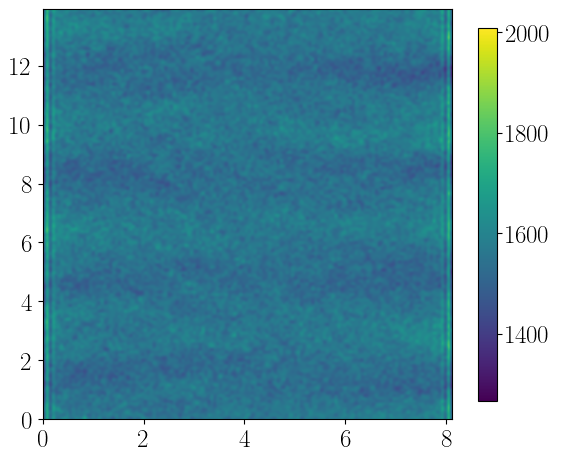

In [6]:
file1 = paths["matrices_centers"] + r"\centers_screen_bulk_double_z_0.31.txt"

options = {'extent': [0, 70/8.62, 0, 120/8.62], 'aspect': 70/120, 'cbarshrink': 0.5, 'cmap': 'viridis'}

fig, ax = plt.subplots(figsize=(6,8))
ax = bp.HeatmapPlotter(file1, '', plot_attr=options).plot(fig, ax, normalize=False, show=False)

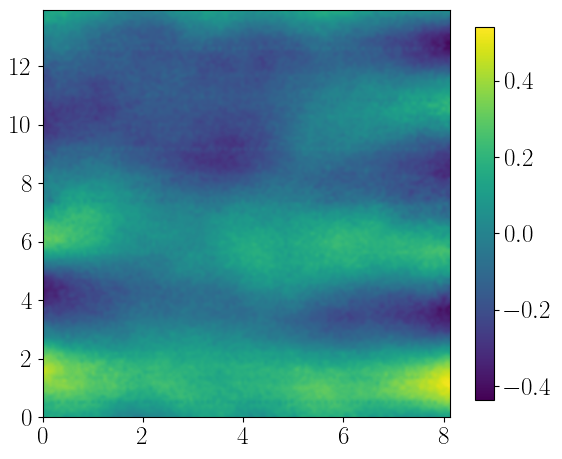

In [3]:
file1 = paths["matrices_directors"] + r"\directors_screen_bulk_4z_local_0.3.txt"

options = {'extent': [0, 70/8.62, 0, 170/8.62], 'aspect': 70/170, 'cbarshrink': 0.5}

fig, ax = plt.subplots(figsize=(6,8))
ax = bp.HeatmapPlotter(file1, '', plot_attr=options).plot(fig, ax, normalize=False, show=False)

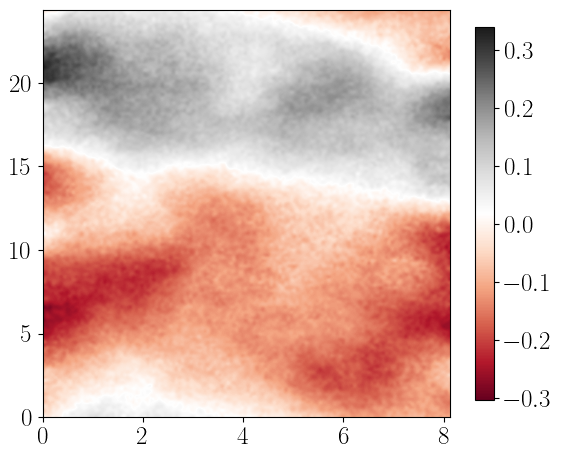

In [40]:
file1 = paths["matrices"] + r"\directors_screen_bulk_4z_local_0.295.txt"

options = {'extent': [0, 70/8.62, 0, 210/8.62], 'aspect': 70/210, 'cbarshrink': 0.5, 'cmap': 'RdGy'}

fig, ax = plt.subplots(figsize=(6,8))
ax = bp.HeatmapPlotter(file1, '', plot_attr=options).plot(fig, ax, normalize=False, show=False)

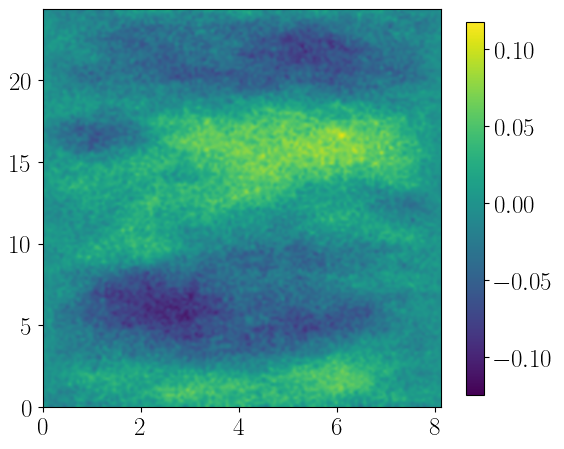

In [4]:
file1 = paths["matrices"] + r"\directors_screen_bulk_4z_240_0.3.txt"

options = {'extent': [0, 70/8.62, 0, 210/8.62], 'aspect': 70/210, 'cbarshrink': 0.5, 'cmap': "viridis"}

fig, ax = plt.subplots(figsize=(6,8))
ax = bp.HeatmapPlotter(file1, '', plot_attr=options).plot(fig, ax, normalize=False, show=False)

# DIRECTOR-X

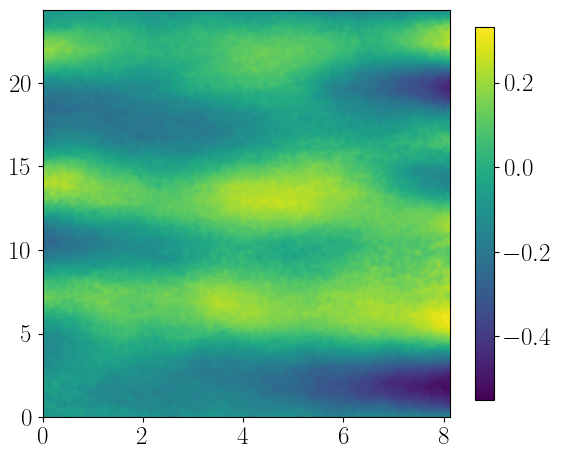

In [8]:
file1 = paths["matrices"] + r"\directors_screen_bulk_4z_240_0.3.txt"

options = {'extent': [0, 70/8.62, 0, 210/8.62], 'aspect': 70/210, 'cbarshrink': 0.5, 'cmap': "viridis"}

fig, ax = plt.subplots(figsize=(6,8))
ax = bp.HeatmapPlotter(file1, '', plot_attr=options).plot(fig, ax, normalize=False, show=False)

# DIRECTOR-Y

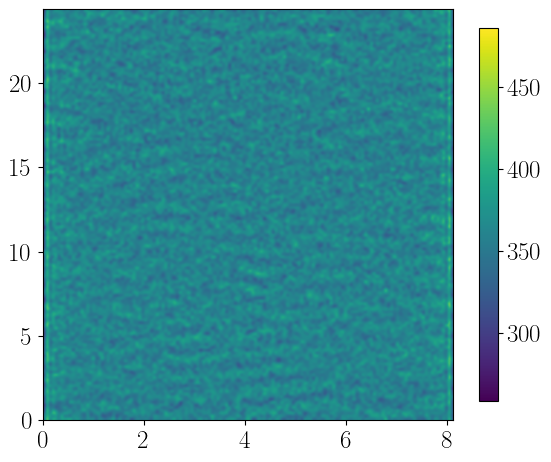

In [5]:
file1 = paths["matrices_centers"] + r"\centers_screen_bulk_4z_240_0.3.txt"

options = {'extent': [0, 70/8.62, 0, 210/8.62], 'aspect': 70/210, 'cbarshrink': 0.5}

fig, ax = plt.subplots(figsize=(6,8))
ax = bp.HeatmapPlotter(file1, '', plot_attr=options).plot(fig, ax, normalize=False, show=False)

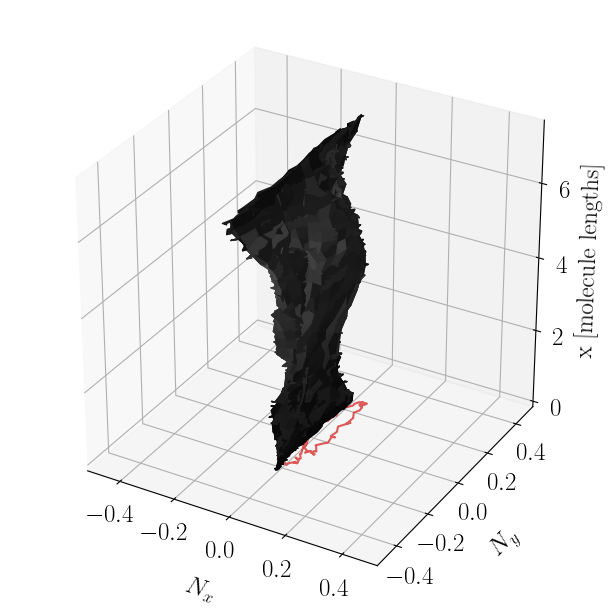

In [9]:
# file = paths['desktop'] + r'\test_3d_plot.txt'
file = paths['desktop'] + r'\3d_0.300.txt'
target = paths['images'] + r'\3d_directors.png'

# data = np.zeros(28, 150, 3, dtype=np.float64)
data = []
with open(file, 'r') as f:
    for i, line in enumerate(f):
        l = line.split()
        data.append(l[-3:])
    
data = np.array(data, dtype=np.float64).reshape((-1, 150, 3))
X_MAX = np.max(data[:, :, 1])
N_PIX = 150
N_SLICES = data.shape[0]
Z_BOX = 7.5
# viridis = matplotlib.colormaps['greys'], N_SLICES).colors

fig = plt.figure(figsize=(8, 6), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# for i in range(N_SLICES):
#     # color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#     x, y = data[i:i+1, :, 0], data[i:i+1, :, 1]
#     z = np.array([i, i+1])

#     color = (1 - np.max(x) / X_MAX) * np.ones(4)
#     options = {'c': color}

#     X, Z = np.meshgrid(x, z)
#     # print(X.shape, Z.shape)
# #     ax.scatter(data[i,:,0], data[i,:,1], c=color)
#     ax.plot_surface(x, y, Z, linewidth=0, color=color)


x = np.array([[*data[i, :, 0], data[i, 0, 0]] for i in range(data.shape[0])])   # extend grid by 1 column to make it periodic
y = np.array([[*data[i, :, 1], data[i, 0, 1]] for i in range(data.shape[0])])
z = np.outer(np.linspace(0, Z_BOX, N_SLICES), np.ones(N_PIX+1))     # 150 x 28+1 grid
# x = data[:, :2, 0]
# y = data[:, :2, 1]
# z = np.outer(np.linspace(0, Z_BOX, N_SLICES), np.ones(2))
# ax.plot_surface(x, y, z)


color = [[] for i in range(x.shape[0])]
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        # c = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        c = np.abs(np.max(x[i, :])) / X_MAX * np.ones(3)
        color[i].append(c)
ax.plot_surface(x, y, z, facecolors=color)

ax.set_xlabel(r'$N_x$', labelpad=15)
ax.set_ylabel(r'$N_y$', labelpad=15)
ax.set_zlabel(r'$\mathrm{x\;[molecule\;lengths]}$')
ax.set_box_aspect(aspect=(1,1,1), zoom=0.95)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)

ax.plot(x[x.shape[0]//2, :], y[y.shape[0]//2, :], c = '#D63230', alpha=0.8)


# plt.show()
# plt.savefig(target, dpi=300)